In [1]:
#importing all the neccesary libraries
import pandas as pd
import numpy as np
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
import matplotlib.pyplot as plt
plt.close('all')

In [2]:
#reding the GSAF5.csv database from the same folder where this document is stored
df = pd.read_csv("GSAF5.csv", sep = ",", engine = "python")

In [3]:
#first look at the table
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [4]:
df["Age"].value_counts(dropna = False)

NaN                        2681
17                          148
18                          145
19                          138
20                          136
15                          135
16                          134
21                          115
22                          113
24                          103
25                          101
14                           97
13                           91
23                           80
26                           80
27                           78
28                           77
29                           75
30                           74
12                           70
35                           64
32                           64
10                           51
40                           50
31                           50
38                           47
34                           45
43                           43
36                           41
33                           40
37                           37
39      

In [5]:
#case number columns are mostly the same, we can drop two of them later
(df["Case Number"] == df["Case Number.1"]).value_counts()

True     5979
False      13
dtype: int64

In [6]:
(df["Case Number.1"] == df["Case Number.2"]).value_counts()

True     5981
False      11
dtype: int64

In [7]:
#how many rows we got
len(df)

5992

In [8]:
#types of each row
df.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

In [9]:
#NaN in each column
null_columns = df.isna().sum()
null_columns[null_columns.gt(0)]

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [10]:
#percentage of NaN per columns
null_prop = null_columns[null_columns.gt(0)] / len(df)
null_prop

Country                   0.007176
Area                      0.067089
Location                  0.082777
Activity                  0.087951
Name                      0.033378
Sex                       0.094626
Age                       0.447430
Injury                    0.004506
Fatal (Y/N)               0.003171
Time                      0.536215
Species                   0.489653
Investigator or Source    0.002503
href formula              0.000167
href                      0.000501
Unnamed: 22               0.999833
Unnamed: 23               0.999666
dtype: float64

In [11]:
#checking columns with the most NaN values
null_prop[null_prop.gt(.7)]

Unnamed: 22    0.999833
Unnamed: 23    0.999666
dtype: float64

In [12]:
#drop Unnamed :22 and Unnamed :23 since they are mostly empty
df = df.drop(columns=null_prop[null_prop.gt(.7)].index)

In [13]:
#drop case number.1 and case number.2 since they hold the same info as case number
df = df.drop(columns =["Case Number.1","Case Number.2"])

In [14]:
#drop href formula and href since they are links that we dont need to analyse the data
df = df.drop(columns =["href formula","href"])

In [15]:
#drop name because of privacy and because we dont really care about the names and 1/3 of the information is missing 
df = df.drop(columns =["Name"])

In [16]:
#re order columns and putting original order first as an Id because i like that format better than the one in case number
df = df[["original order","Date","Year","Type","Country","Area","Location","Activity","Sex ","Age","Injury","Fatal (Y/N)","Time","Species ","Investigator or Source","pdf","Case Number"]]

In [17]:
#drop pdf, case number, investigator source since they are not usefull for our analysis
df = df.drop(columns =["pdf", "Investigator or Source","Case Number"])

In [18]:
#remove spaces from sex and species because of ocd, change name of original order and fatal
df = df.rename(columns={"Sex ": "Sex", "Species ": "Species", "original order" : "CaseId", "Fatal (Y/N)" : "Survive (True/False)"})

In [19]:
null_columns = df.isna().sum()
null_columns[null_columns.gt(0)]

Country                   43
Area                     402
Location                 496
Activity                 527
Sex                      567
Age                     2681
Injury                    27
Survive (True/False)      19
Time                    3213
Species                 2934
dtype: int64

In [20]:
null_prop = null_columns[null_columns.gt(0)] / len(df)
null_prop

Country                 0.007176
Area                    0.067089
Location                0.082777
Activity                0.087951
Sex                     0.094626
Age                     0.447430
Injury                  0.004506
Survive (True/False)    0.003171
Time                    0.536215
Species                 0.489653
dtype: float64

In [21]:
df.head()

,CaseId,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Survive (True/False),Time,Species
0,5993,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN
1,5992,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN
2,5991,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN
3,5990,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN,NaN
4,5989,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark


In [22]:
#replace prefix to gain more data
new_date = df["Date"].str.replace("Reported ", "").str.replace("Summer-", "").str.replace("summer-", "").str.replace("Early ", "").str.replace("Late ", "")

In [23]:
df["Date"] = new_date

In [24]:
#changing date type from object to datetime64
df["Date"] = pd.to_datetime(df["Date"], errors = "coerce")

In [25]:
df["Date"]

0      2016-09-18
1      2016-09-18
2      2016-09-18
3      2016-09-17
4      2016-09-16
          ...    
5987          NaT
5988          NaT
5989          NaT
5990          NaT
5991          NaT
Name: Date, Length: 5992, dtype: datetime64[ns]

In [26]:
#counting null values
null_date = df["Date"].isnull().sum()
null_date

347

In [27]:
df.head()

,CaseId,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Survive (True/False),Time,Species
0,5993,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN
1,5992,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN
2,5991,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN
3,5990,2016-09-17,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN,NaN
4,5989,2016-09-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark


In [28]:
df["Age"] = pd.to_numeric(df['Age'], errors='coerce')
df["Age"].dtypes

dtype('float64')

In [29]:
#Changing columns to appropriate data type
for col in ['CaseId']:
    df[col] = df[col].astype('int64')
for col in ['Survive (True/False)']:
    df[col] = df[col].astype('bool')

In [30]:
df.dtypes

CaseId                           int64
Date                    datetime64[ns]
Year                             int64
Type                            object
Country                         object
Area                            object
Location                        object
Activity                        object
Sex                             object
Age                            float64
Injury                          object
Survive (True/False)              bool
Time                            object
Species                         object
dtype: object

In [31]:
df.head()

,CaseId,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Survive (True/False),Time,Species
0,5993,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16.0,Minor injury to thigh,True,13h00,NaN
1,5992,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36.0,Lacerations to hands,True,11h00,NaN
2,5991,2016-09-18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43.0,Lacerations to lower leg,True,10h43,NaN
3,5990,2016-09-17,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,True,NaN,NaN
4,5989,2016-09-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,True,NaN,2 m shark


In [32]:
#Finding out the most important values of the name column changing it to frame for better vizualization and transpose it
df["Age"].to_frame().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,3210.0,27.123364,13.719479,1.0,17.0,24.0,35.0,87.0


In [33]:
#top 5 countries where the most attacks happpen
df["Country"].value_counts().to_frame().head()

,Country
USA,2116
AUSTRALIA,1279
SOUTH AFRICA,565
PAPUA NEW GUINEA,133
NEW ZEALAND,125


In [34]:
#Type of attack 
df["Type"].value_counts().to_frame()

,Type
Unprovoked,4386
Provoked,557
Invalid,519
Sea Disaster,220
Boat,200
Boating,110


In [35]:
#top 5 most frequent age of attacks
df["Age"].value_counts().to_frame().head()

,Age
17.0,148
18.0,145
19.0,138
20.0,136
15.0,135


In [36]:
#Surfing is the most common activity before a shark attack 
df["Activity"].value_counts().to_frame().head()

,Activity
Surfing,904
Swimming,819
Fishing,414
Spearfishing,321
Bathing,153


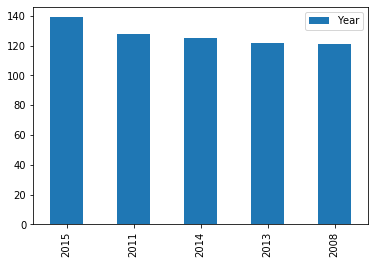

In [37]:
#Seems like the year with the most shark attack is 2015, drop 0 because they are not relevant
df_year = df["Year"].to_frame()
df_year["Year"][(df_year.T != 0).any()].value_counts().to_frame().head().plot.bar()


In [40]:
#Most dangerous areas overall
df["Area"].value_counts().to_frame().head()

,Area
Florida,990
New South Wales,468
Queensland,300
Hawaii,282
California,276


In [41]:
#Making a new data base for USA shark attacks
df_usa = df.loc[df.Country.isin(["USA"])]

In [42]:
#Top 5 most dangerous locations in the usa
df_usa["Location"].value_counts().to_frame().head()

,Location
"New Smyrna Beach, Volusia County",157
"Daytona Beach, Volusia County",28
"Myrtle Beach, Horry County",17
"Ponce Inlet, Volusia County",17
"Melbourne Beach, Brevard County",15


In [43]:
#Top 5 most dangerous species
df_species = df["Species"].value_counts().to_frame().dropna().drop("Shark involvement not confirmed").head()

In [44]:
#Top 5 most dangerous species
df_species

,Species
White shark,161
Tiger shark,68
Bull shark,52
6' shark,40
4' shark,39


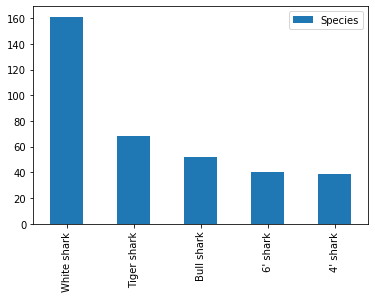

In [45]:
df_species.plot.bar()

In [46]:
#Create data frame for date without cero values
df_date = df[df.Date.notnull()]

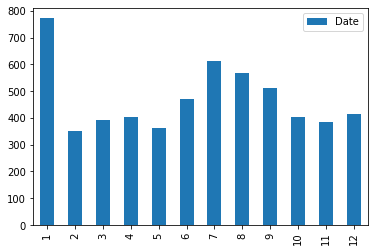

In [47]:
#Nr of attacks each month worldwide
df_date["Date"].dt.month.value_counts().to_frame().sort_index().plot.bar()

In [48]:
df["Age"].value_counts(dropna = False)

NaN     2782
17.0     148
18.0     145
19.0     138
20.0     136
15.0     135
16.0     134
21.0     115
22.0     113
24.0     103
25.0     101
14.0      97
13.0      91
23.0      80
26.0      80
27.0      78
28.0      77
29.0      75
30.0      74
12.0      70
32.0      64
35.0      64
10.0      51
31.0      50
40.0      50
38.0      47
34.0      45
43.0      43
36.0      41
33.0      40
39.0      37
37.0      37
42.0      36
9.0       35
11.0      35
41.0      34
52.0      34
45.0      32
50.0      32
44.0      29
47.0      28
8.0       27
49.0      27
46.0      25
48.0      25
7.0       21
55.0      20
51.0      19
60.0      14
54.0      14
6.0       14
57.0      14
53.0      13
58.0      12
59.0      11
61.0      11
56.0       9
63.0       9
69.0       8
62.0       8
5.0        7
68.0       6
70.0       6
3.0        4
65.0       4
64.0       4
71.0       3
66.0       3
77.0       3
75.0       2
74.0       2
78.0       2
1.0        2
81.0       1
72.0       1
84.0       1
67.0       1